Monte Carlo Simulation for European Call Option Pricing

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def monte_carlo_call_option_price(S, K, T, r, sigma, num_simulations = 10000):
    np.random.seed(45)

    Z = np.random.standard_normal(num_simulations)

    ST = S * np.exp((r- 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    payoffs = np.maximum(ST - K, 0)

    call_price = np.exp(-r*T) *np.mean(payoffs)

    return call_price, ST


In [22]:
S = 100
K = 105
T = 0.5
r = 0.05
sigma = 0.20
mc_price, stock_paths = monte_carlo_call_option_price(S, K, T, r, sigma)
print(f"Monte Carlo Estimated Call Price: ${mc_price: .2f}")


Monte Carlo Estimated Call Price: $ 4.54


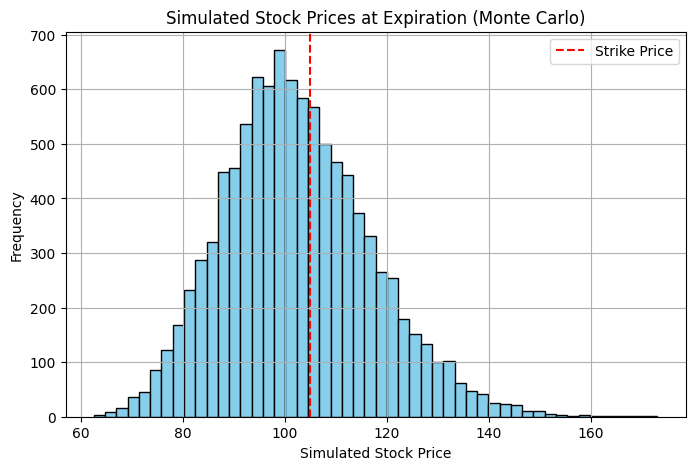

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(stock_paths, bins=50, color='skyblue', edgecolor='black')
plt.axvline(K, color='red', linestyle='--', label='Strike Price')
plt.title('Simulated Stock Prices at Expiration (Monte Carlo)')
plt.xlabel('Simulated Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

I ran ten thousand simulations of the stock price at expiration using Geometric Brownian Motion.
Then calcualted the call option payoff for each outcome.
Finally, we averaged those payoffs and discounted them using the risk-free rate to get the present value (the option price).

In [24]:
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Get BSM price using same inputs
bsm_price = black_scholes_price(S, K, T, r, sigma)

print(f"Black-Scholes Price: ${bsm_price:.2f}")
print(f"Monte Carlo Price:   ${mc_price:.2f}")
print(f"Difference:          ${abs(bsm_price - mc_price):.4f}")

Black-Scholes Price: $4.58
Monte Carlo Price:   $4.54
Difference:          $0.0392


The Black-Scholes formula PROVIDES a clsed-form solution for European call options under lognormal assumptions. We use this to validate our Monte Carlo simulation.
As expected, the Monte Carlo estimate closely matches the Black-Scholes result when the number of simulations is large enough. This confirms the correctness of our simulation.

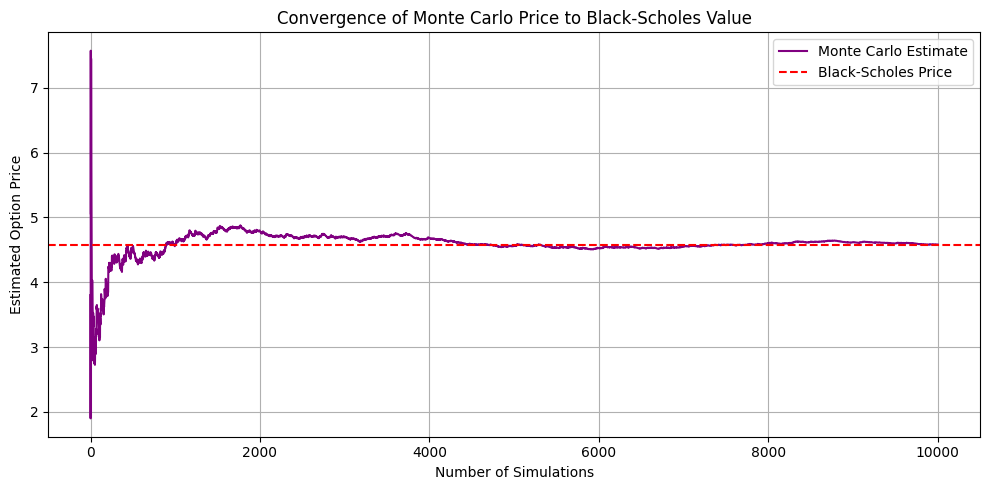

In [25]:
def plot_convergence(S, K, T, r, sigma, bsm_price, num_simulations=10000):
    np.random.seed(42)
    Z = np.random.standard_normal(num_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    discounted = np.exp(-r * T) * payoffs

    # Calculate cumulative average
    cumulative_avg = np.cumsum(discounted) / np.arange(1, num_simulations + 1)

    # Plot convergence
    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_avg, label='Monte Carlo Estimate', color='purple')
    plt.axhline(bsm_price, color='red', linestyle='--', label='Black-Scholes Price')
    plt.title("Convergence of Monte Carlo Price to Black-Scholes Value")
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Option Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the convergence plot
plot_convergence(S, K, T, r, sigma, bsm_price)

This grash shows how the Monte Carlo estimate of the option price stabilizes as more simulations are performed. The horizontal separated red line is the Black-Scholes price.
As the number of simulations increases, the random variation in the estimated price diminishes and the result converges to the true theoretical value.

# Summarized steps implemented in this notebook
I estimated a European call option price using Monte Carlo simulation.
I validated my result against the Black-Scholes formula.
The convergence plot shows that as simulations increase, my estimate stabilizes at the correct value.
This simulation captures the stochastic behavior of asset prices and builds intuition for probabilistic modeling in quantitative finance.